<h2 style="color:blue" align="center">Handwritten digit recognition using Artificial Neural Network</h2>

Here I shall use Artificial Neural Network with a single hidden layer for the multiclass classification problem of handwritten digit recognition. I shall use the MNIST dataset, available in 'keras' to train our model.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("Training size:",len(X_train))
print("Test size:",len(X_test))

Training size: 60000
Test size: 10000


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

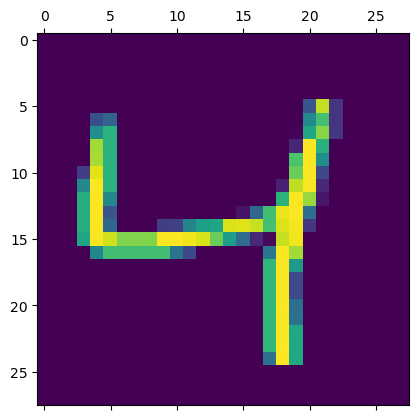

In [6]:
plt.matshow(X_train[2])

In [7]:
y_train[2]

4

In [8]:
print(X_train.max())
print(X_test.max())

255
255


In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [11]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8737 - loss: 0.4478
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9611 - loss: 0.1301
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9753 - loss: 0.0834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9804 - loss: 0.0651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9842 - loss: 0.0523


In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9706 - loss: 0.0960


[0.08052302151918411, 0.9753000140190125]

In [13]:
y_predicted = model.predict(X_test_flattened)
print(y_predicted.shape)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


array([4.5181229e-03, 6.5584304e-03, 1.8102725e-01, 9.1675693e-01,
       4.6475159e-07, 3.4051470e-02, 9.4692529e-09, 9.9999058e-01,
       1.8426051e-03, 4.6629414e-01], dtype=float32)

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(0.5, 1.0, 'Confusion matrix')

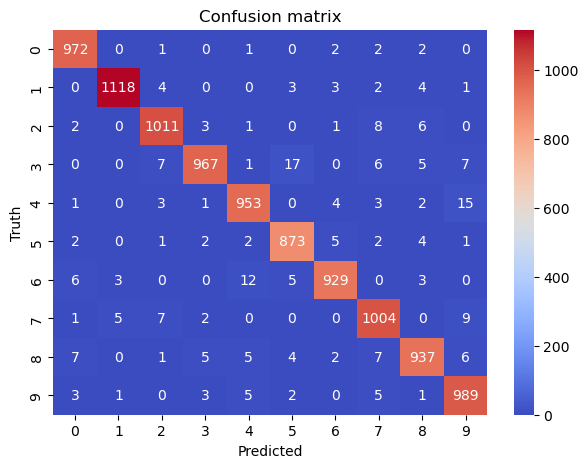

In [15]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix')

It is possible to flatten the data inside the 'keras' function. Then we don't require to flatten the data manually

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8762 - loss: 0.4498
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9625 - loss: 0.1327
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.0875
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9810 - loss: 0.0646
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0508


In [17]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.0978


[0.0819089263677597, 0.9753000140190125]

In [18]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 1.0, 'Confusion matrix')

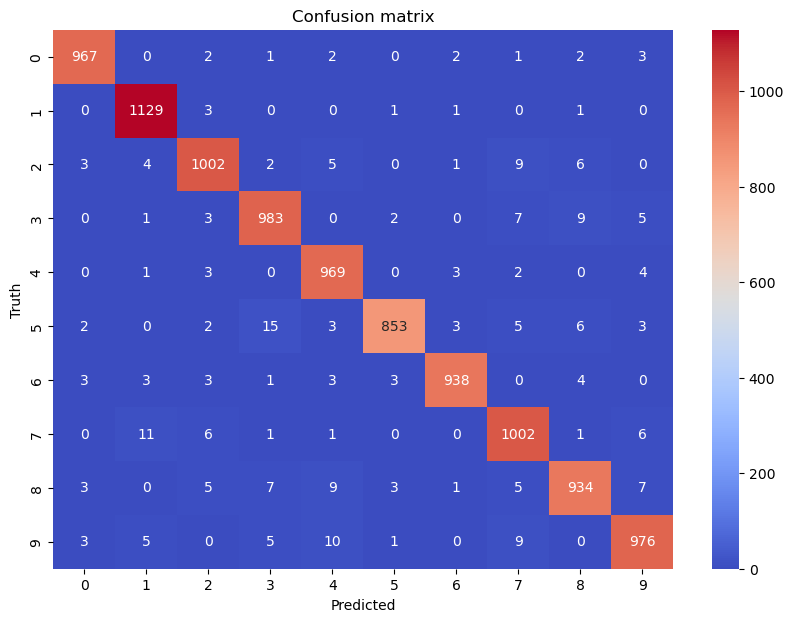

In [19]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix')